In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### Housing Data 
We are considering housing data from Kaggle which contains information about various properties, including their features and prices. 
which comprises the following columns `price`, `area`, `bathrooms`, `stories`, `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `parking`, `prefarea`, `furnishingstatus`

In [3]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Housing Data Information
To understand the structure of the dataset, we use the `df.info()` to get the details about the column names, data types, and missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Missing Values
We are using `df.isnull().sum()` to find the missing values.

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Summary statistics of Housing Dataset
To analyze the distribution and key statistics of the dataset, we use the `df.describe()` function.

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Data Types
To understand the types of data each in column, we use the `df.dtypes` function.

In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## Standardizing in Housing Dataset
- To ensure consistency, we converted all column names to **title case** 
- To streamline analysis and preprocessing, we categorized the dataset's features into **different types**:
- To prepare the data for modeling, categorical variables were converted into **numerical values**:

In [8]:
df.columns = df.columns.str.title()

continuous_cols = ['Price', 'Area']
binary_cols = ['Mainroad', 'Guestroom', 'Basement', 'Hotwaterheating', 'Airconditioning', 'Prefarea']
discrete_cols = ['Bedrooms', 'Bathrooms', 'Stories', 'Parking']
categorical_cols = ['Furnishingstatus']

df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df['Furnishingstatus'] = df['Furnishingstatus'].map({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})
df.head()

,Price,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Prefarea,Furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


- **Visualizing Distributions of Price**: The first plot shows the distribution of price for distinct variables.

- **Visualizing Distribution of Area**: The second plot shows the distribution of area for distinct variables. 

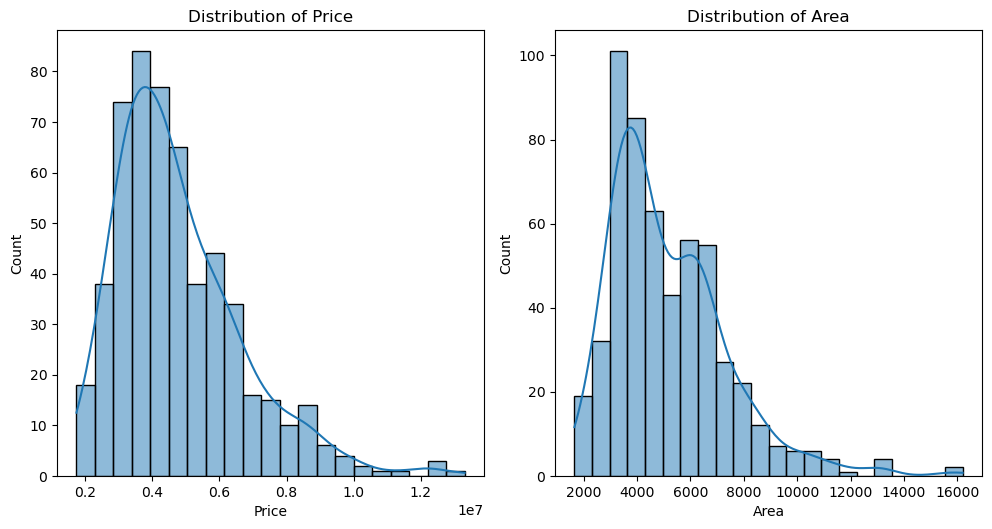

In [9]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

- **Visualizing Distribution of data**: For variables `Bedrooms`, `Bathrooms`, `Stories`, `Parking` and `Furninshing Status`.

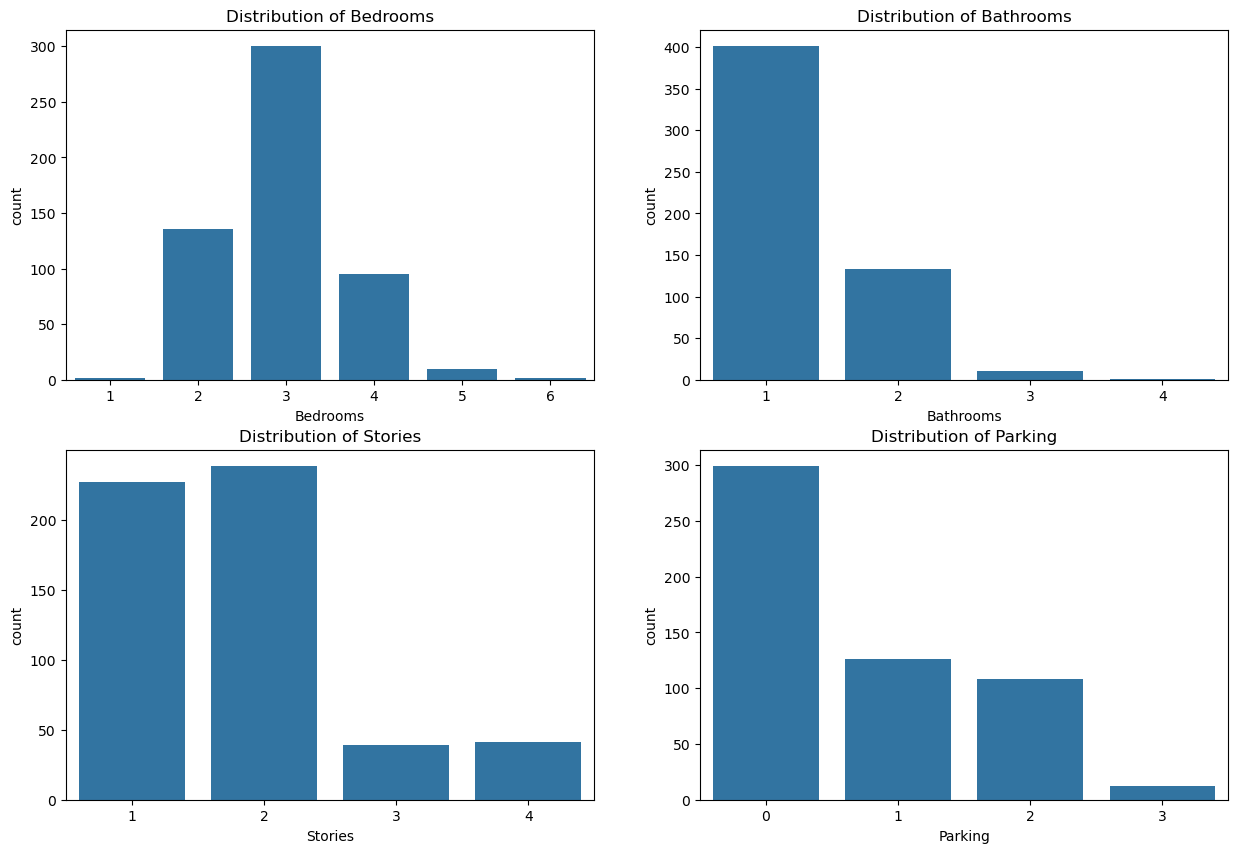

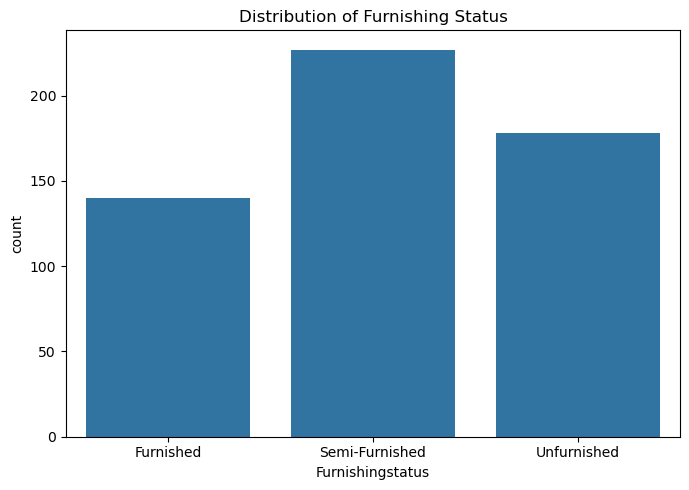

In [10]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(discrete_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[var])
    plt.title(f'Distribution of {var}')

plt.figure(figsize=(7, 5))
sns.countplot(x=df.Furnishingstatus)
plt.title('Distribution of Furnishing Status')
plt.xticks(ticks=[0, 1, 2], labels=['Furnished', 'Semi-Furnished', 'Unfurnished'])

plt.tight_layout()
plt.show()

**Understanding Relationship Between Variables**: The correlation matrix helps identify the relationships between variables in the dataset. A positive correlation (closer to **1**) indicates that as one variable increases, the other also increases, while a negative correlation (closer to **-1**) suggests an inverse relationship.

- **Keyinsights**:
- Visualizing the data based on relationship between the variables:

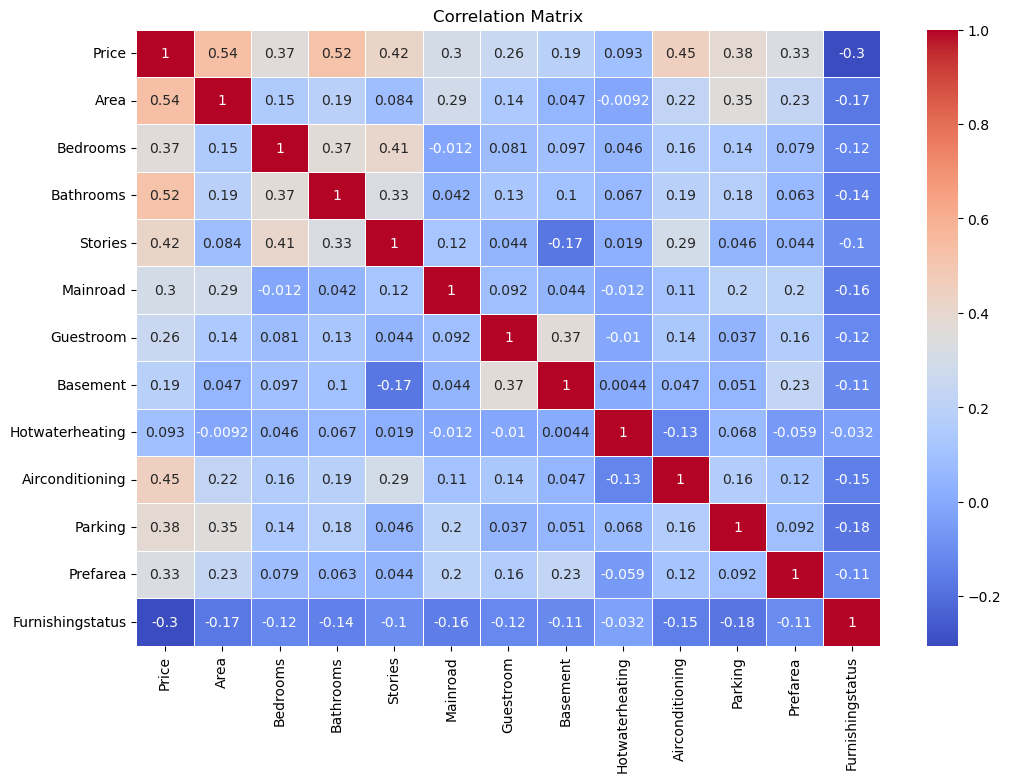

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Plotting Relationships Between Continuous Variables**: `sns.pairplot()` plots scatter plots of all pairs of numerical variables (`Price` and `Area`) to analyze their relationships.

- **Understanding the Pairplot:**
- The scatter plot of `Price` vs. `Area` helps to identify trends—whether there is a linear correlation (e.g., increased prices for bigger areas).
- The diagonal plots show the distribution of single variables, telling us about their spread and skewness.

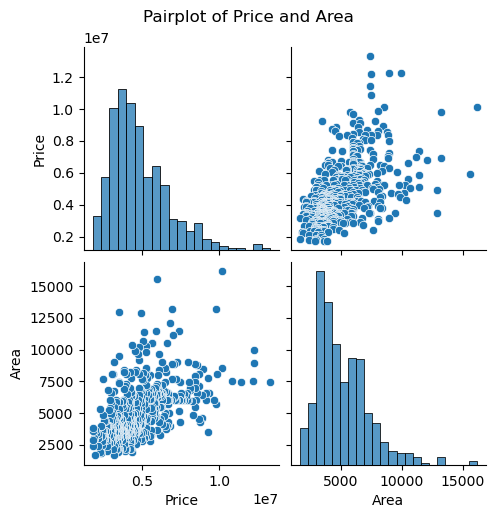

In [12]:
sns.pairplot(df[continuous_cols])
plt.suptitle('Pairplot of Price and Area', y=1.02)
plt.show()

### Visualizing Boxplot
Visualizig the data by comparing price values with some considerable factors. 

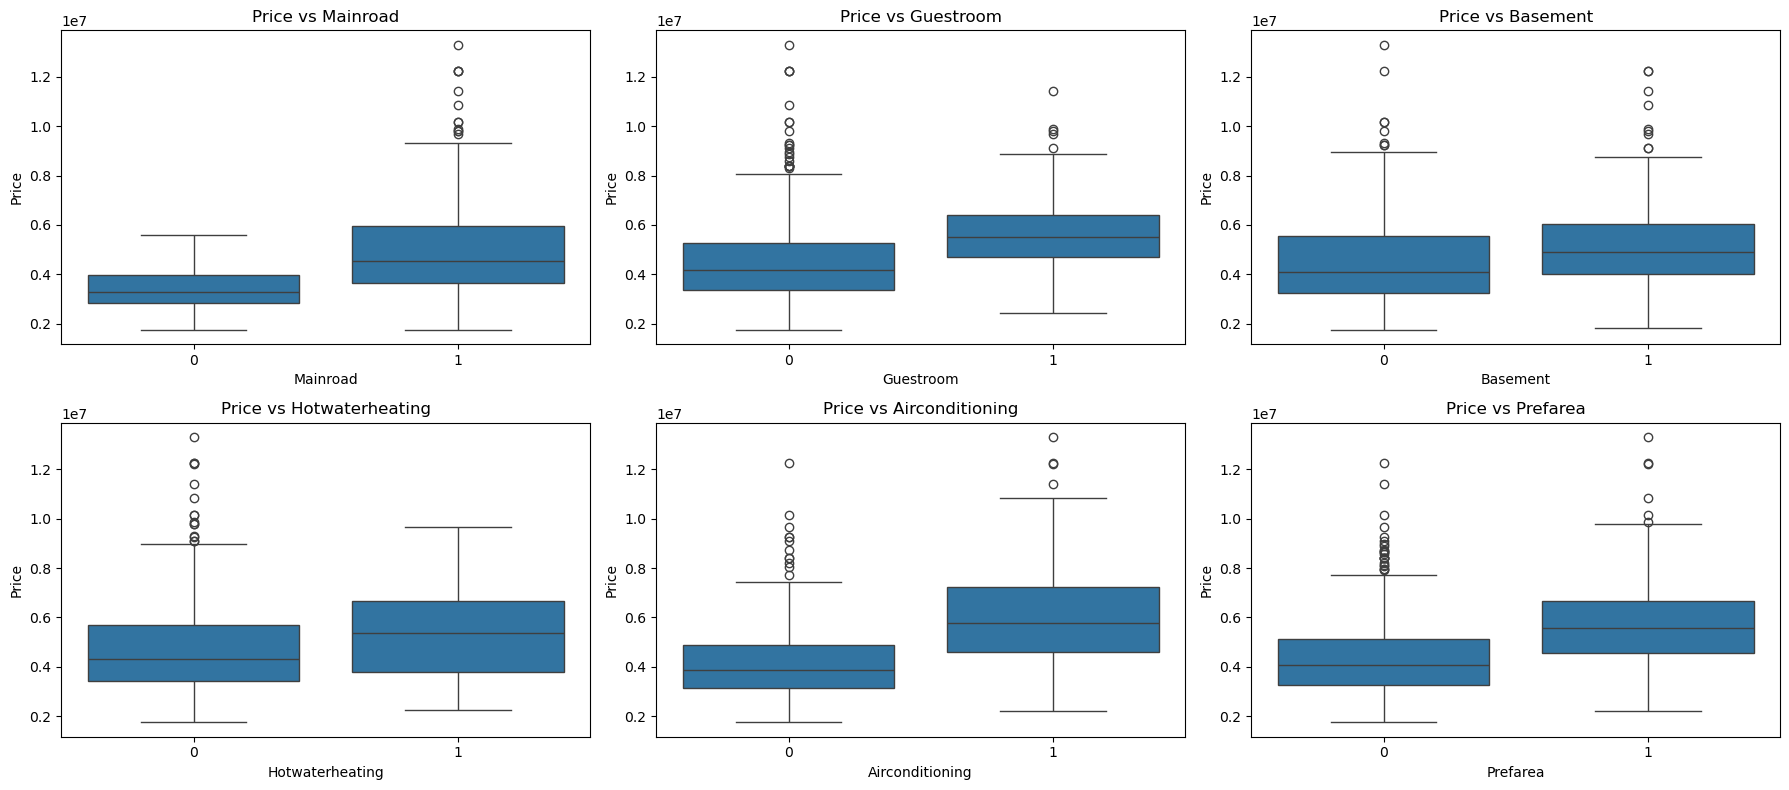

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()
for i, var in enumerate(binary_cols):
    sns.boxplot(x=df[var], y=df.Price, ax=axes[i])
    axes[i].set_title(f'Price vs {var}')
plt.tight_layout()
plt.show()

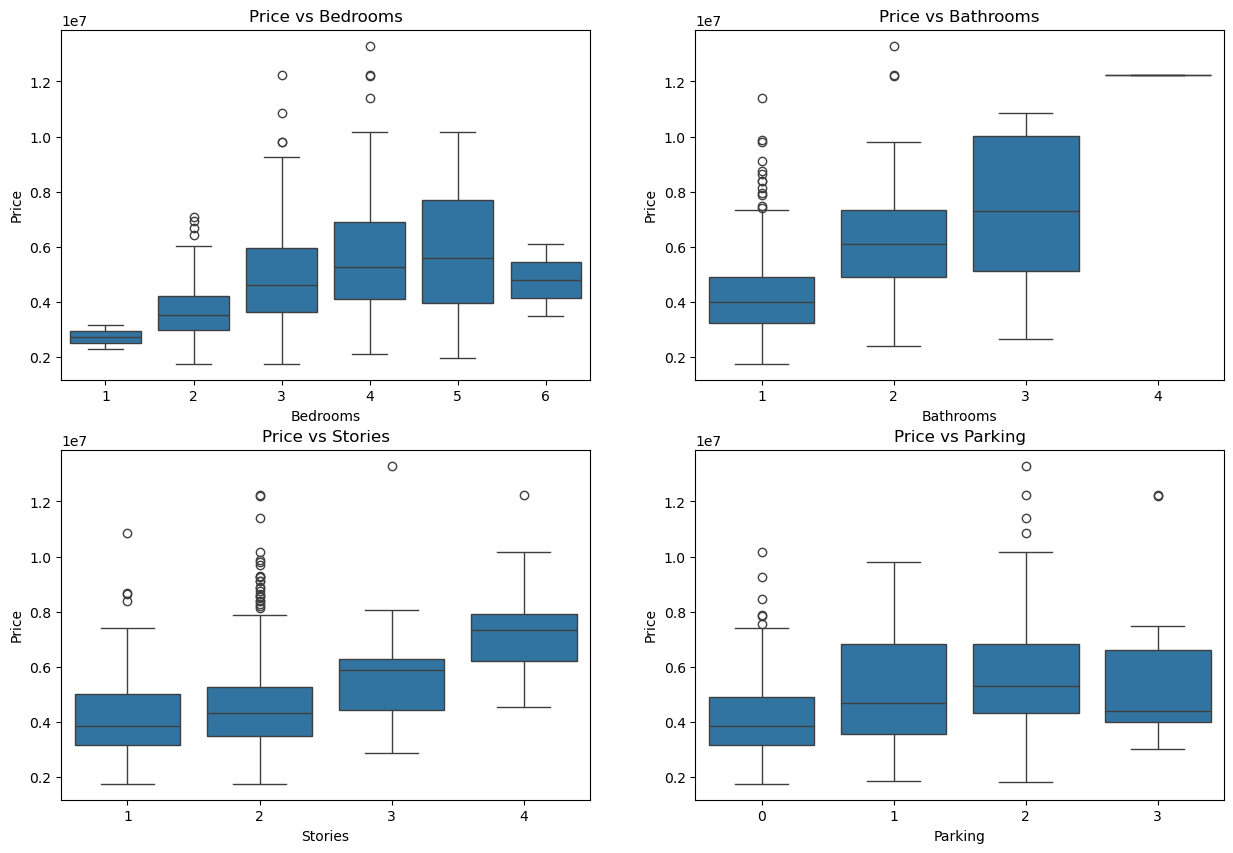

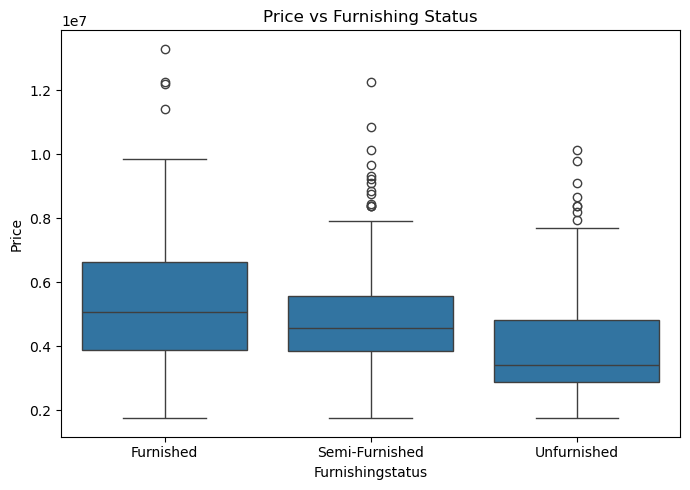

In [14]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(discrete_cols, 1):
    plt.subplot(2, 2, i) 
    sns.boxplot(x=df[var], y=df.Price)
    plt.title(f'Price vs {var}')

plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Furnishingstatus'], y=df['Price'])
plt.title('Price vs Furnishing Status')
plt.xticks(ticks=[0, 1, 2], labels=['Furnished', 'Semi-Furnished', 'Unfurnished'])

plt.tight_layout() 
plt.show()

# Regression Analysis
- Find the relationship between independent and dependent variables.

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Evaluating the Performance of Linear Regression Models**

- **Training the Model**:
  - An instance of `LinearRegression()` is instantiated and trained on `X_train` and `y_train` with the `.fit()` method.
  - The model, now trained, is used to predict values for `X_test`.

- **Calculating Error Metrics**:
  - **Mean Absolute Error (MAE)**: The mean of the absolute difference between actual and predicted values.
  - **Mean Squared Error (MSE)**: It calculates the average of the squared deviations of predicted from actual values.
  - **Root Mean Squared Error (RMSE)**: The square root of MSE, which renders it interpretable in the same units as the target variable.
  - **R² Score**: The proportion of the variance in the dependent variable explained by the model (a value close to **1** indicates better performance).

- **Showing Results** summary:
  - The metrics are printed in a formatted output for ease of interpretation.
  - Lower `MAE`, `MSE`, and `RMSE` values suggest better model performance, and a higher `R² Score` suggests a good fit.


## Linear Regression with One Variable (Simple Linear Regression)
## Price with area

In [16]:
X = df[['Area']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_rounded = np.round(y_pred, -2)

mae = mean_absolute_error(y_test, y_pred_rounded )
mse = mean_squared_error(y_test, y_pred_rounded )
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rounded )

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.4f}')

MAE: 1398880.00
MSE: 2865321909090.91
RMSE: 1692726.18
R² Score: 0.3833


## Linear Regression with Multiple Variables (Multiple Linear Regression)

In [18]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.4f}')

MAE: 884725.71
MSE: 1481693327820.20
RMSE: 1217248.26
R² Score: 0.6811


## Polynomial Regression with One Variable

In [20]:
# 1. Data Preparation
X = df[['Area']]
y = df['Price']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 3. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 4. Standardize the Polynomial Features (after transformation)
scaler = StandardScaler()

# Fit the scaler on the training set and transform it, then transform the test set
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [21]:
# 5. Model Training (Linear Regression)
model = LinearRegression()
model.fit(X_train_poly_scaled, y_train)

# 6. Prediction
y_pred = model.predict(X_test_poly_scaled)

# 7. Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 8. Display Results
print(f'Polynomial Regression (degree=2) Results:')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.4f}')

Polynomial Regression (degree=2) Results:
MAE: 1393418.66
MSE: 3027897944475.95
RMSE: 1740085.61
R² Score: 0.3483


## Polynomial Regression with Multiple Variables

In [22]:
# 1. Data Preparation
X = df.drop(columns=['Price'])
y = df['Price']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 3. Apply Polynomial Transformation to Continuous Variables Only
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_train_cont = X_train[continuous_cols[1:]]
X_test_cont = X_test[continuous_cols[1:]]

X_train_poly = poly.fit_transform(X_train_cont)
X_test_poly = poly.transform(X_test_cont)

# 4. Standardize the Polynomial Features (after transformation)
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# 5. Combine Polynomial Features with Discrete, Binary, and Categorical Features
X_train_processed = np.hstack([X_train_poly_scaled, X_train[discrete_cols + binary_cols + categorical_cols].values])
X_test_processed = np.hstack([X_test_poly_scaled, X_test[discrete_cols + binary_cols + categorical_cols].values])

In [23]:
# 5. Model Training (Linear Regression)
model = LinearRegression()
model.fit(X_train_processed, y_train)

# 6. Prediction
y_pred = model.predict(X_test_processed)

# 7. Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 8. Display Results
print(f'Polynomial Regression (degree=2) Results:')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.4f}')

Polynomial Regression (degree=2) Results:
MAE: 898577.45
MSE: 1517430401317.58
RMSE: 1231840.25
R² Score: 0.6734


## Lasso Regression

In [24]:
# 1. Data Preparation
X = df.drop(columns=['Price'])
y = df['Price']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_cont_scaled = scaler.fit_transform(X_train[continuous_cols[1:]])
X_test_cont_scaled = scaler.transform(X_test[continuous_cols[1:]])

X_train_processed = np.hstack([X_train_cont_scaled, X_train[discrete_cols + binary_cols + categorical_cols]])
X_test_processed = np.hstack([X_test_cont_scaled, X_test[discrete_cols + binary_cols + categorical_cols]])

In [25]:
# 4. Find Optimal Alpha
alphas = np.logspace(-4, 4, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_processed, y_train)
print(f"Optimal alpha: {lasso_cv.alpha_:.6f}")

# 5. Train Final Model
final_lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=10000)
final_lasso.fit(X_train_processed, y_train)

# 6. Evaluation
y_pred = final_lasso.predict(X_test_processed)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('\nLasso Regression Results:')
print(f'MAE: {mae:,.2f}')
print(f'MSE: {mse:,.2f}')
print(f'RMSE: {rmse:,.2f}')
print(f'R²: {r2:.4f}')

Optimal alpha: 613.590727

Lasso Regression Results:
MAE: 884,882.27
MSE: 1,482,020,445,920.03
RMSE: 1,217,382.62
R²: 0.6810


## Ridge Regression

In [26]:
# 1. Data Preparation
X = df.drop(columns=['Price'])
y = df['Price']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_cont_scaled = scaler.fit_transform(X_train[continuous_cols[1:]])
X_test_cont_scaled = scaler.transform(X_test[continuous_cols[1:]])

X_train_processed = np.hstack([X_train_cont_scaled, X_train[discrete_cols + binary_cols + categorical_cols]])
X_test_processed = np.hstack([X_test_cont_scaled, X_test[discrete_cols + binary_cols + categorical_cols]])

In [27]:
# 4. Find Optimal Alpha
ridge_alphas = np.logspace(-4, 4, 100) 
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5, scoring='neg_mean_squared_error', gcv_mode='auto')
ridge_cv.fit(X_train_processed, y_train)
print(f"\nOptimal Ridge alpha: {ridge_cv.alpha_:.4f}")

# 5. Train Final Model
final_ridge = Ridge(alpha=ridge_cv.alpha_, max_iter=1000)  
final_ridge.fit(X_train_processed, y_train)

# 6. Evaluation
y_pred = final_ridge.predict(X_test_processed)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('\nRidge Regression Results:')
print(f'MAE: {mae:,.2f}')
print(f'MSE: {mse:,.2f}')
print(f'RMSE: {rmse:,.2f}')
print(f'R²: {r2:.4f}')


Optimal Ridge alpha: 3.3516

Ridge Regression Results:
MAE: 887,113.80
MSE: 1,483,190,306,396.86
RMSE: 1,217,863.01
R²: 0.6808


## Elastic net regression

In [28]:
# 1. Data Preparation
X = df.drop(columns=['Price'])
y = df['Price']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_cont_scaled = scaler.fit_transform(X_train[continuous_cols[1:]])
X_test_cont_scaled = scaler.transform(X_test[continuous_cols[1:]])

X_train_processed = np.hstack([X_train_cont_scaled, X_train[discrete_cols + binary_cols + categorical_cols]])
X_test_processed = np.hstack([X_test_cont_scaled, X_test[discrete_cols + binary_cols + categorical_cols]])

In [29]:
alphas = np.logspace(-4, 4, 100)
l1_ratios = np.linspace(0.1, 1, 10)

elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, max_iter=10000, random_state=42)
elastic_net_cv.fit(X_train_processed, y_train)
print(f"Optimal alpha: {elastic_net_cv.alpha_:.6f}, Optimal l1_ratio: {elastic_net_cv.l1_ratio_:.4f}")


final_elastic_net = ElasticNet(alpha=elastic_net_cv.alpha_, l1_ratio=elastic_net_cv.l1_ratio_, max_iter=10000)
final_elastic_net.fit(X_train_processed, y_train)

l1_ratios = [.1, .3, .5, .7, .9]  # Test different L1/L2 mixes

elastic_net_cv = ElasticNetCV(alphas=alphas,l1_ratio=l1_ratios,cv=5,max_iter=10000, random_state=42)
elastic_net_cv.fit(X_train_processed, y_train)

# 5. Train Final Model
final_en = ElasticNet(  alpha=elastic_net_cv.alpha_, l1_ratio=elastic_net_cv.l1_ratio_,max_iter=10000)
final_en.fit(X_train_processed, y_train)

y_pred = final_en.predict(X_test_processed)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('\nElastic Net Regression Results:')
print(f'Optimal alpha: {elastic_net_cv.alpha_:.6f}')
print(f'Optimal L1 ratio: {elastic_net_cv.l1_ratio_:.2f} (1=Lasso, 0=Ridge)')
print(f'MAE: {mae:,.2f}')
print(f'MSE: {mse:,.2f}')
print(f'RMSE: {rmse:,.2f}')
print(f'R²: {r2:.4f}')

# Feature selection stats
print(f"\nFeatures used: {np.sum(final_en.coef_ != 0)}/{X_train_processed.shape[1]}")

Optimal alpha: 0.010476, Optimal l1_ratio: 0.2000

Elastic Net Regression Results:
Optimal alpha: 0.081113
Optimal L1 ratio: 0.90 (1=Lasso, 0=Ridge)
MAE: 887,486.37
MSE: 1,483,526,476,626.04
RMSE: 1,218,001.02
R²: 0.6807

Features used: 12/12


## Model Comparison

| Model                          | Type               | MAE          | MSE                   | RMSE        | R²     | Optimal Parameters       | Features Used |
|--------------------------------|--------------------|--------------|-----------------------|-------------|--------|--------------------------|---------------|
| Simple Linear Regression       | Linear (Area only) | 1,398,880.35 | 2,865,320,934,297.48  | 1,692,725.89 | 0.3833 | -                        | 1/12          |
| Multiple Linear Regression     | Linear (All)       | 884,725.71   | 1,481,693,327,820.20  | 1,217,248.26 | 0.6811 | -                        | 12/12         |
| Polynomial Regression (deg=2)  | Polynomial         | 1,393,418.66 | 3,027,897,944,475.95  | 1,740,085.61 | 0.3483 | degree=2                 | 1/12          |
| Multivariate Polynomial        | Polynomial         | 898,577.45   | 1,517,430,401,317.58  | 1,231,840.25 | 0.6734 | degree=2                 | 12/12         |
| Lasso Regression               | Regularized        | 884,882.27   | 1,482,020,445,920.03  | 1,217,382.62 | 0.6810 | α=613.59                 | 12/12        |
| Ridge Regression               | Regularized        | 887,113.80   | 1,483,190,306,396.86  | 1,217,863.01 | 0.6808 | α=3.35                   | 12/12         |
| Elastic Net Regression         | Regularized        | 887,562.98   | 1,483,600,090,664.87  | 1,218,031.24 | 0.6807 | α=0.010476, l1_ratio=0.2000  | 12/12        |

### Best Model Based on Metrics
**Multiple Linear Regression** is the best model based on the metrics extracted from the table. Here’s why:

- **MAE**: The **Multiple Linear Regression** has the lowest **MAE** of 884,725.71, indicating it makes the smallest absolute errors compared to other models.
- **MSE**: It also has the lowest **MSE** (1,481,693,327,820.20) among all models, signifying that its predictions have the least squared error.
- **RMSE**: The **Multiple Linear Regression** has the lowest **RMSE** (1,217,248.26), suggesting its predictions are more consistent and closer to the actual values.
- **R²**: The model has the highest **R²** of 0.6811, indicating it explains 68.11% of the variance in the data.

### Conclusion

- **Linear Regression with Multiple Variables** provides the best performance in terms of the lowest MAE, MSE, and RMSE while achieving a high R² score of 0.6811.
- Regularization models such as **Lasso**, **Ridge**, and **Elastic Net** offer slightly worse performance, with only marginal improvements in error metrics and slightly lower R² scores.
- **Multiple Regression** is the most effective model for this dataset because it does not impose additional constraints, allowing for a more flexible fit compared to the regularization models, which may unnecessarily shrink the coefficients and reduce predictive accuracy.

This makes **Multiple Linear Regression** the most reliable model in terms of prediction accuracy.

## kNN Regression
* A non-parametric model
that makes predictions based on feature similarity. While
easy to implement, its performance is sensitive to the
choice of k and can degrade with noisy or high-
dimensional dat

In [30]:
# 1. Basic Data Preparation
X = df.drop(columns=['Price'])
y = df['Price']

continuous_col = ['Area']
discrete_cols = ['Bedrooms', 'Bathrooms', 'Stories', 'Parking']
binary_cols = ['Mainroad', 'Guestroom', 'Basement', 'Hotwaterheating', 'Airconditioning', 'Prefarea']
categorical_cols = ['Furnishingstatus']

# 2. Train-Test Split (stratified by price bins)
price_bins = pd.qcut(y, q=5, labels=False, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=price_bins)

preprocessor = ColumnTransformer(
    transformers=[
        ('cont', StandardScaler(), continuous_col),
        ('discrete', MinMaxScaler(), discrete_cols),
        ('binary', 'passthrough', binary_cols),
        ('cat', 'passthrough', categorical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [31]:
# 4. Parameter Grid for Tuning
param_grid = {
    'n_neighbors': [7, 9, 10, 11, 15],  # Wider range of neighbors
    'weights': ['uniform', 'distance'],  # Weights options
    'p': [1, 1.5, 2],  # Distance metrics options
    'metric': ['minkowski']  # Only Minkowski distance
}

# 5. Grid Search with Cross-Validation
grid_search = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_processed, y_train)

# 6. Evaluation
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_processed) 

# 7. Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 8. Results
print("Best Parameters:", grid_search.best_params_)
print(f'MAE: {mae:,.2f}')
print(f'MSE: {mse:,.2f}')
print(f'RMSE: {rmse:,.2f}')
print(f'R²: {r2:.4f}')
# Adjusted R²
n = X_test_processed.shape[0]  # number of samples
p = X_test_processed.shape[1]  # number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R²: {adjusted_r2:.4f}')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
MAE: 665,066.01
MSE: 798,947,010,532.43
RMSE: 893,838.36
R²: 0.7204
Adjusted R²: 0.6406


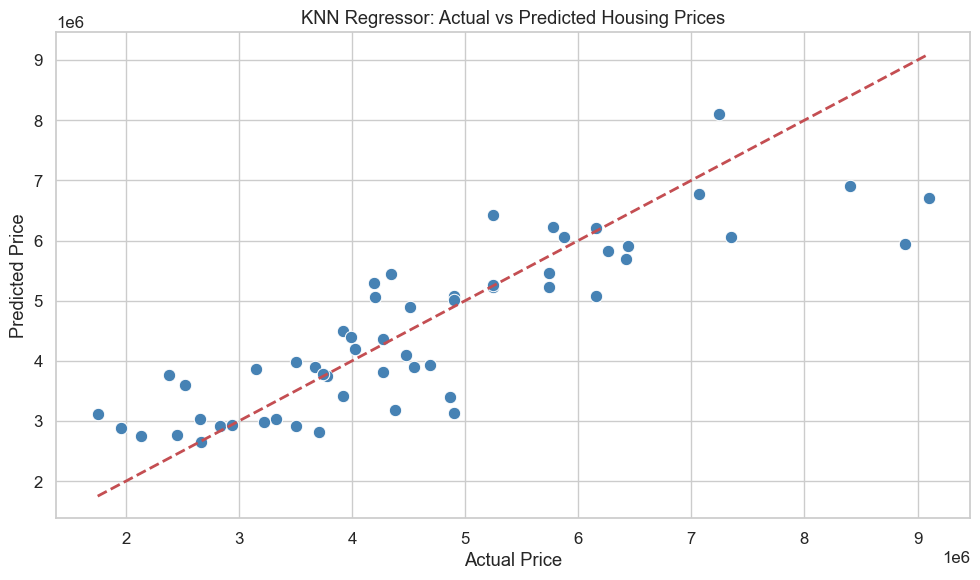

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid', font_scale=1.1)

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='steelblue', edgecolor='w', s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN Regressor: Actual vs Predicted Housing Prices')
plt.tight_layout()
plt.show()

## **Random Forest Regressor**
* An ensemble learning method that
reduces overfitting by aggregating multiple decision trees,
improving predictive performance

In [33]:
# 1. Data Preparation
X = df.drop(columns=['Price'])
y = df['Price']

# 2. Stratified Train-Test Split
price_bins = pd.qcut(y, q=5, labels=False, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=price_bins)

In [34]:
# Define parameter grid for RFR
param_grid_rf_optimized = {
    'n_estimators': [100, 150],              # Reducing n_estimators to 100 and 150 as larger values didn't provide significant improvement
    'max_depth': [10, 11],                   # Limiting max_depth to 10 and 11, which performed well
    'min_samples_split': [3, 4, 5],              # Based on the best result, testing values 3 and 4 for min_samples_split
    'min_samples_leaf': [1, 2],               # Retaining values 1 and 2 as effective options for leaf node size
    'max_features': ['sqrt'],                # 'sqrt' was the optimal value for max_features
    'bootstrap': [True]                       # Keeping bootstrap=True as it performed well in the previous search
}

# Initialize and tune RFR
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_rf = GridSearchCV(
    rf_model,
    param_grid_rf_optimized,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

# Evaluate
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print("Best Parameters:", grid_search_rf.best_params_)
print(f'MAE: {mae_rf:,.2f}')
print(f'RMSE: {rmse_rf:,.2f}')
print(f'R²: {r2_rf:.4f}')
# Adjusted R²
n = X_test_processed.shape[0]  # number of samples
p = X_test_processed.shape[1]  # number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R²: {adjusted_r2:.4f}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Random Forest Results:
Best Parameters: {'bootstrap': True, 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
MAE: 665,540.35
RMSE: 869,066.41
R²: 0.7357
Adjusted R²: 0.6406


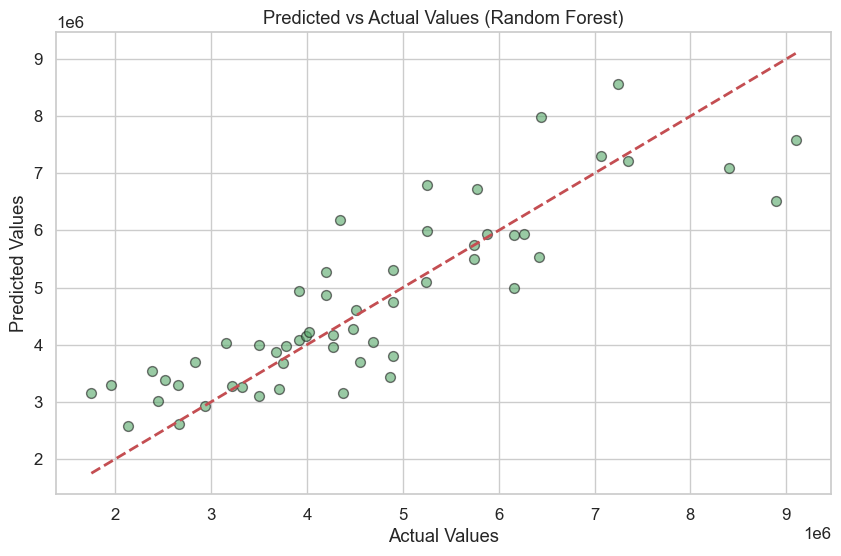

In [35]:
# Predicted vs Actual Plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='g', edgecolors='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Predicted vs Actual Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


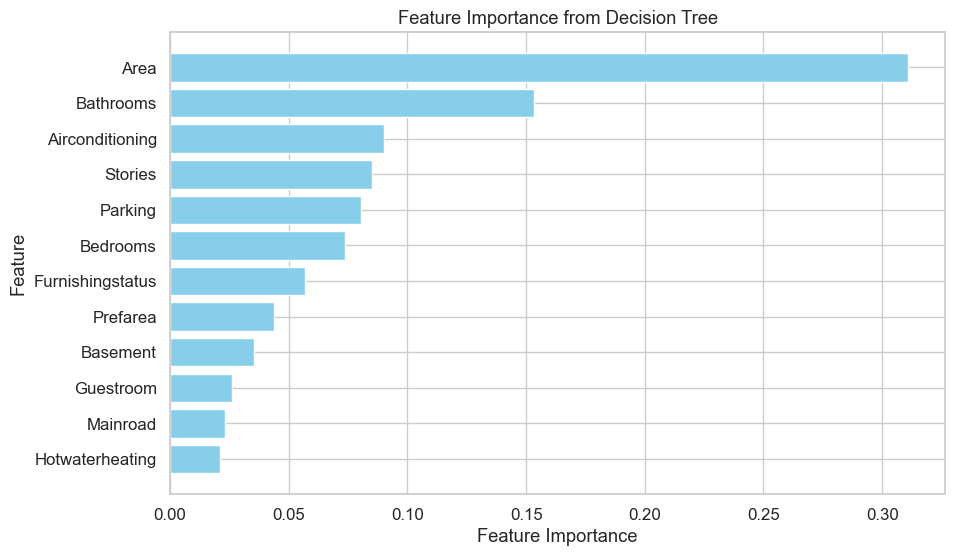

In [36]:
# Get feature importances
feature_importances = best_rf.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = X_train.columns[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

| Model                     | Best Parameters                                                                                     | MAE        | RMSE       | R²     |
|---------------------------|-----------------------------------------------------------------------------------------------------|------------|------------|--------|
| **Support Vector Regressor** | `{'C': 7, 'epsilon': 0.15, 'gamma': 0.05, 'kernel': 'rbf'}`                                        | 739,366.75 | 926,151.63 | 0.6998 |
| **kNN Regression**          | `{'metric': 'minkowski', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}`                        | 665,066.01 | 893,838.36 | 0.7204 |
| **Decision Tree**           | `{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}`          | 794,408.28 | 1,038,243.97 | 0.6228 |
| **Gradient Boosting**       | `{'learning_rate': 0.08, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.7}` | 794,408.28 | 1,038,243.97 | 0.6803 |
| **XGBoost**                 | `{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}` | 691,089.58 | 938,031.00 | 0.6921 |
| **Random Forest**           | `{'bootstrap': True, 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}` | 665,540.35 | 869,066.41 | **0.7357** |

## Extra Algorithms

## Support Vector Regressor

In [37]:
# 1. Data Preparation
continuous_col = ['Area']
discrete_cols = ['Bedrooms', 'Bathrooms', 'Stories', 'Parking']
binary_cols = ['Mainroad', 'Guestroom', 'Basement', 'Hotwaterheating', 'Airconditioning', 'Prefarea']
categorical_cols = ['Furnishingstatus']

X = df.drop(columns=['Price'])
y = df['Price'] / 1_000_00  # Scale target to millions

# 2. Stratified Train-Test Split
price_bins = pd.qcut(y, q=5, labels=False, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=price_bins)

# 3. Feature Processing
preprocessor = ColumnTransformer(
    transformers=[
        ('cont', StandardScaler(), continuous_col),
        ('discrete', MinMaxScaler(feature_range=(0, 5)), discrete_cols),
        ('binary', 'passthrough', binary_cols),
        ('cat', 'passthrough', categorical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [38]:
# 4. Targeted Hyperparameter Tuning
param_grid = {
    'kernel': ['rbf'],
    'C': [7, 8, 9],
    'epsilon': [0.15, 0.18, 0.2],
    'gamma': [0.05, 0.08, 0.1]
}

svr = SVR(max_iter=8000, tol=1e-4)
grid_search = GridSearchCV(
    svr, 
    param_grid, 
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_processed, y_train)

# 5. Evaluation
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test_processed) * 1_000_00
y_test_original = y_test * 1_000_00

metrics = {
    'MAE': mean_absolute_error(y_test_original, y_pred),
    'MSE': mean_squared_error(y_test_original, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test_original, y_pred)),
    'R²': r2_score(y_test_original, y_pred)
}

print("\nOptimized SVM Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MAE: {metrics['MAE']:,.2f}")
print(f"MSE: {metrics['MSE']:,.2f}")
print(f"RMSE: {metrics['RMSE']:,.2f}")
print(f"R²: {metrics['R²']:.4f}")
# Adjusted R²
n = X_test_processed.shape[0]  # number of samples
p = X_test_processed.shape[1]  # number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R²: {adjusted_r2:.4f}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Optimized SVM Results:
Best Parameters: {'C': 7, 'epsilon': 0.15, 'gamma': 0.05, 'kernel': 'rbf'}
MAE: 739,366.75
MSE: 857,756,838,477.04
RMSE: 926,151.63
R²: 0.6998
Adjusted R²: 0.6406


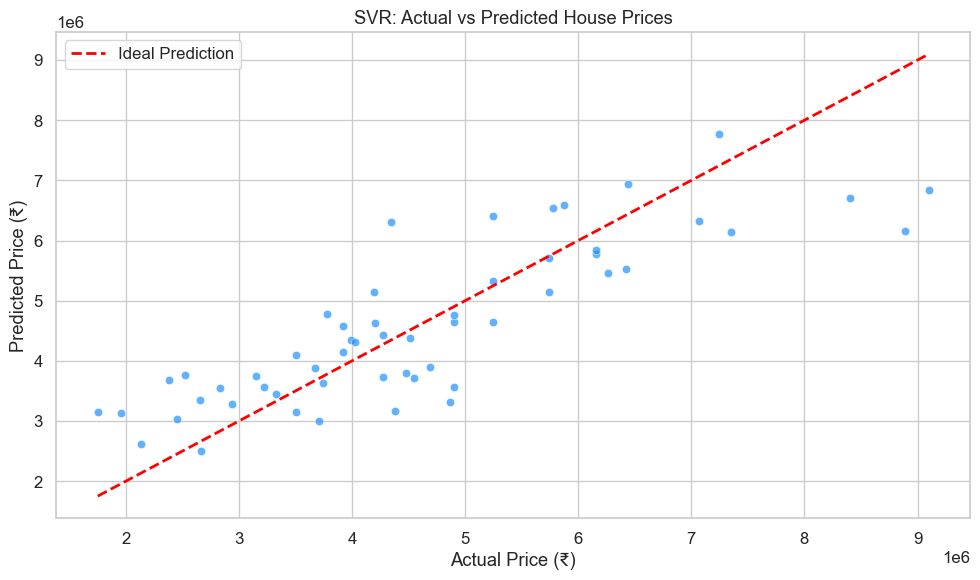

In [39]:
# Plot predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original, y=y_pred, alpha=0.7, color='dodgerblue')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()],
         color='red', lw=2, linestyle='--', label='Ideal Prediction')

plt.title('SVR: Actual vs Predicted House Prices')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Predicted Price (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Decision Tree Regressor

In [40]:
# 1. Data Preparation
X = df.drop(columns=['Price'])
y = df['Price']

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 2. Stratified Train-Test Split
price_bins = pd.qcut(y, q=5, labels=False, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=price_bins)

In [41]:
param_grid = {
    'max_depth': [9, 10, 11],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']  # still optimal
}

tree_model = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(
    tree_model,
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# 7. Evaluation
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

# 8. Metrics (convert y_test back to original scale if needed)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 9. Print results
print("Best Parameters:", grid_search.best_params_)
print(f'MAE: {mae:,.2f}')
print(f'MSE: {mse:,.2f}')
print(f'RMSE: {rmse:,.2f}')
print(f'R²: {r2:.4f}')


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
MAE: 794,408.28
MSE: 1,077,950,537,855.38
RMSE: 1,038,243.97
R²: 0.6228


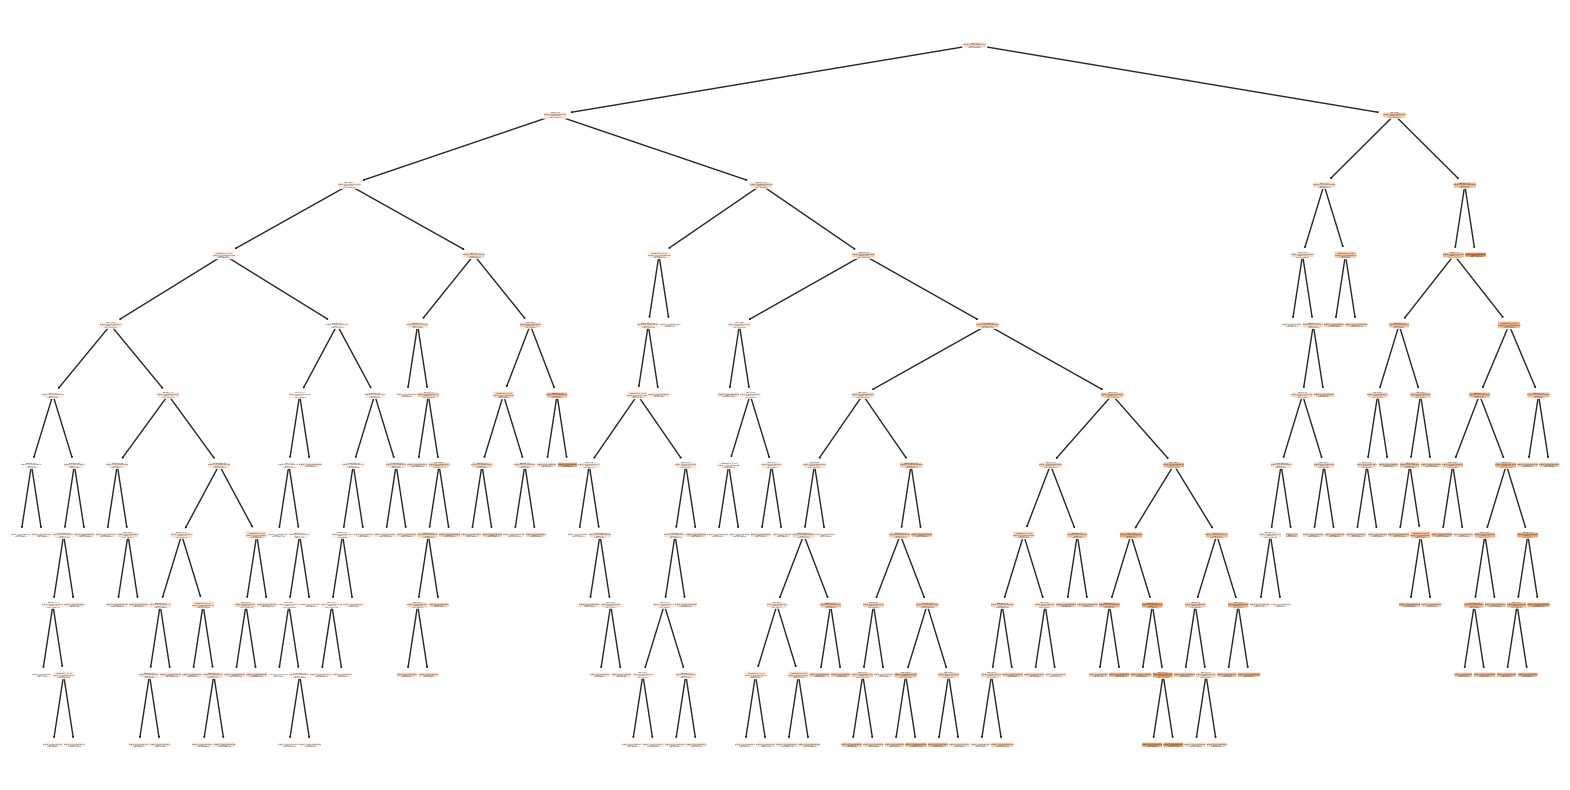

In [42]:
# Plot the tree using the best estimator from GridSearchCV
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, rounded=True, class_names=['Price'])
plt.show()


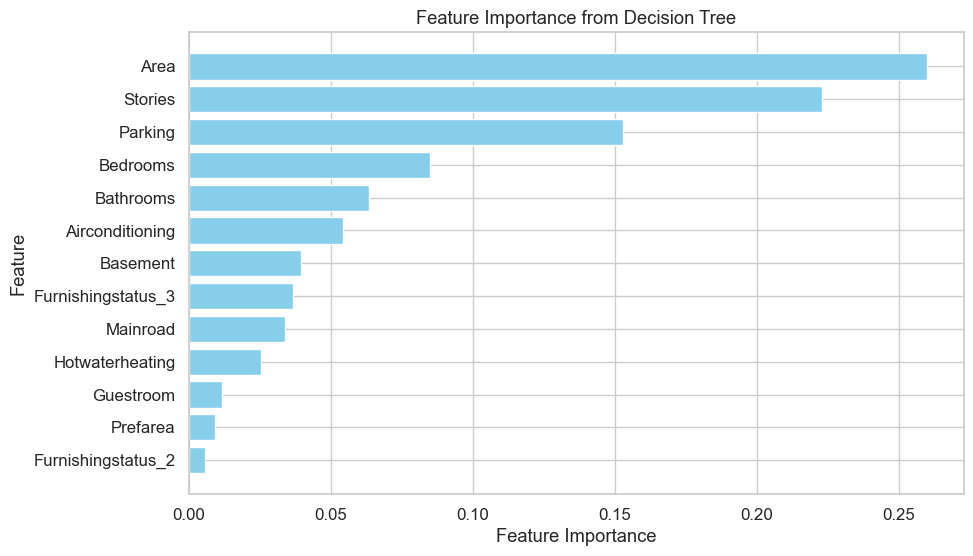

In [43]:
# Get feature importances
feature_importances = best_tree.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = X_train.columns[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

## Gradient Boosting Regressor

In [44]:
# 1. Data Preparation
X = df.drop(columns=['Price'])
y = df['Price']

# 2. Stratified Train-Test Split
price_bins = pd.qcut(y, q=5, labels=False, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=price_bins)

In [45]:
param_grid_gb_optimized = {
    'n_estimators': [100, 150],              # Based on the best results with 100, extending to 150 for experimentation
    'learning_rate': [0.05, 0.08, 0.09],     # Testing values around the best performing rate of 0.08
    'max_depth': [3, 4],                     # Limiting depth to avoid overfitting (3 and 4 found optimal)
    'min_samples_split': [2, 3],             # Lower values to maintain flexibility while avoiding too much overfitting
    'min_samples_leaf': [2, 3],              # Values near the best performing range
    'max_features': ['sqrt'],                # 'sqrt' was optimal based on results
    'subsample': [0.7, 0.8],                 # Slightly reducing the subsample range based on previous success
}

# Initialize and tune GBR
gb_model = GradientBoostingRegressor(random_state=42)

grid_search_gb = GridSearchCV(
    gb_model,
    param_grid_gb_optimized,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_gb.fit(X_train, y_train)

# Evaluate
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Results:")
print("Best Parameters:", grid_search_gb.best_params_)
print(f'MAE: {mae:,.2f}')
print(f'MSE: {mse:,.2f}')
print(f'RMSE: {rmse:,.2f}')
print(f'R²: {r2:.4f}')
# Adjusted R²
n = X_test_processed.shape[0]  # number of samples
p = X_test_processed.shape[1]  # number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R²: {adjusted_r2:.4f}')

Fitting 5 folds for each of 96 candidates, totalling 480 fits

Gradient Boosting Results:
Best Parameters: {'learning_rate': 0.08, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.7}
MAE: 794,408.28
MSE: 1,077,950,537,855.38
RMSE: 1,038,243.97
R²: 0.6803
Adjusted R²: 0.5890


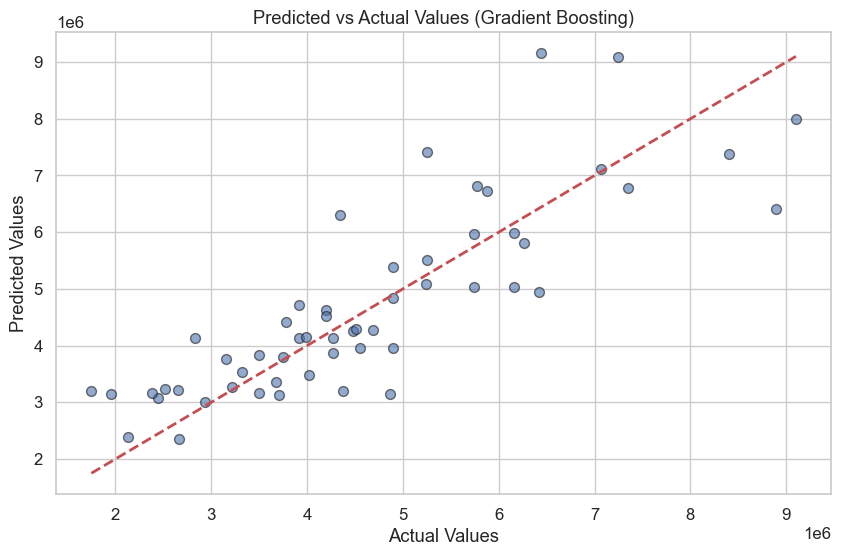

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6, color='b', edgecolors='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Predicted vs Actual Values (Gradient Boosting)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


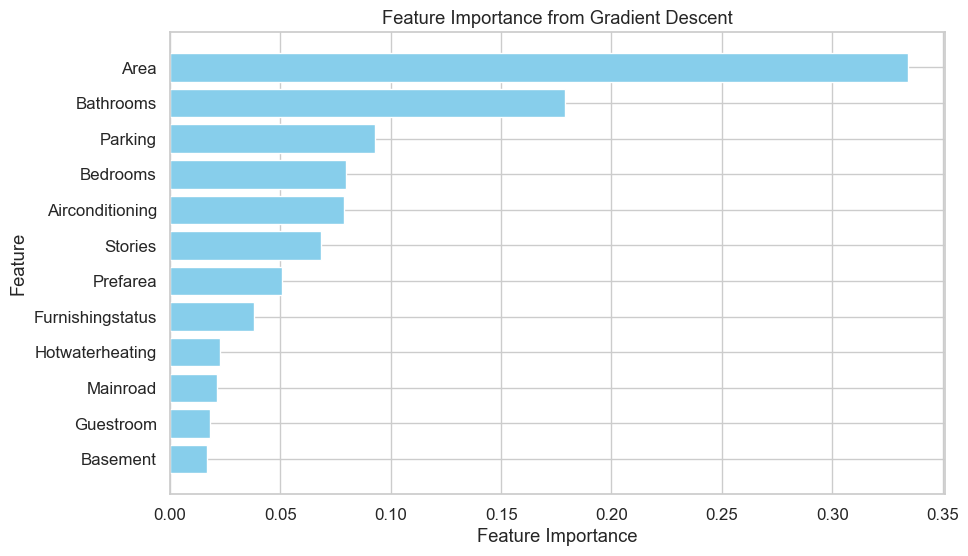

In [47]:
# Get feature importances
feature_importances = best_gb.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = X_train.columns[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Gradient Descent')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

## Xtreme Gradient Boosting (XGBoost)

In [48]:
# 1. Data Preparation
X = df.drop(columns=['Price'])
y = df['Price']

# 2. Stratified Train-Test Split
price_bins = pd.qcut(y, q=5, labels=False, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=price_bins)

In [ ]:
# Define parameter grid for XGBoost
param_grid_xgb_optimized = {
    'n_estimators': [100, 200],                # Limit to 100 and 200, based on previous results
    'max_depth': [3, 4],                       # Use depth values around 3 and 4 to avoid too deep trees that might overfit
    'learning_rate': [0.05, 0.1],              # Testing lower learning rates for finer optimization, based on best results
    'subsample': [0.8, 0.9],                   # Keeping subsampling within a reasonable range to prevent overfitting
    'colsample_bytree': [0.8, 0.9],            # Tuning feature subsampling to improve generalization
    'gamma': [0, 0.1],                         # Keep gamma lower for a balance between complexity and regularization
}

# Initialize and tune XGBoost
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
grid_search_xgb = GridSearchCV(
    xgb_model,
    param_grid_xgb_optimized,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Evaluate
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print("\nXGBoost Results:")
print("Best Parameters:", grid_search_xgb.best_params_)
print(f'MAE: {mae_xgb:,.2f}')
print(f'RMSE: {rmse_xgb:,.2f}')
print(f'R²: {r2_xgb:.4f}')
# Adjusted R²
n = X_test_processed.shape[0]  # number of samples
p = X_test_processed.shape[1]  # number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R²: {adjusted_r2:.4f}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals_xgb = y_test - y_pred_xgb

# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_xgb, y=residuals_xgb, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot: XGBoost Actual vs Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='b', edgecolors='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Predicted vs Actual Values (XGBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [ ]:
# Get feature importances
feature_importances = best_xgb.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = X_train.columns[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

| Model                     | Best Parameters                                                                                     | MAE        | RMSE       | R²     |
|---------------------------|-----------------------------------------------------------------------------------------------------|------------|------------|--------|
| **Support Vector Regressor** | `{'C': 7, 'epsilon': 0.15, 'gamma': 0.05, 'kernel': 'rbf'}`                                        | 739,366.75 | 926,151.63 | 0.6998 |
| **kNN Regression**          | `{'metric': 'minkowski', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}`                        | 665,066.01 | 893,838.36 | 0.7204 |
| **Decision Tree**           | `{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}`          | 794,408.28 | 1,038,243.97 | 0.6228 |
| **Gradient Boosting**       | `{'learning_rate': 0.08, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.7}` | 794,408.28 | 1,038,243.97 | 0.6803 |
| **XGBoost**                 | `{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}` | 691,089.58 | 938,031.00 | 0.6921 |
| **Random Forest**           | `{'bootstrap': True, 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}` | 665,540.35 | 869,066.41 | **0.7357** |